In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

In [190]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [191]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [192]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [193]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [195]:
# Get the overall concise summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [196]:
# Lets check what are the numerical features in the df_train dataset
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [197]:
# numeric features head
numeric_features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [198]:
# Now a general description of SalePrice
# Now, as we will be predicting 'SalePrice' lets see description of that column
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
top_correlations = df_train.corr()
top_feature_columns = top_correlations['SalePrice'][top_correlations['SalePrice'].values > 0.2].index.values
top_feature_columns

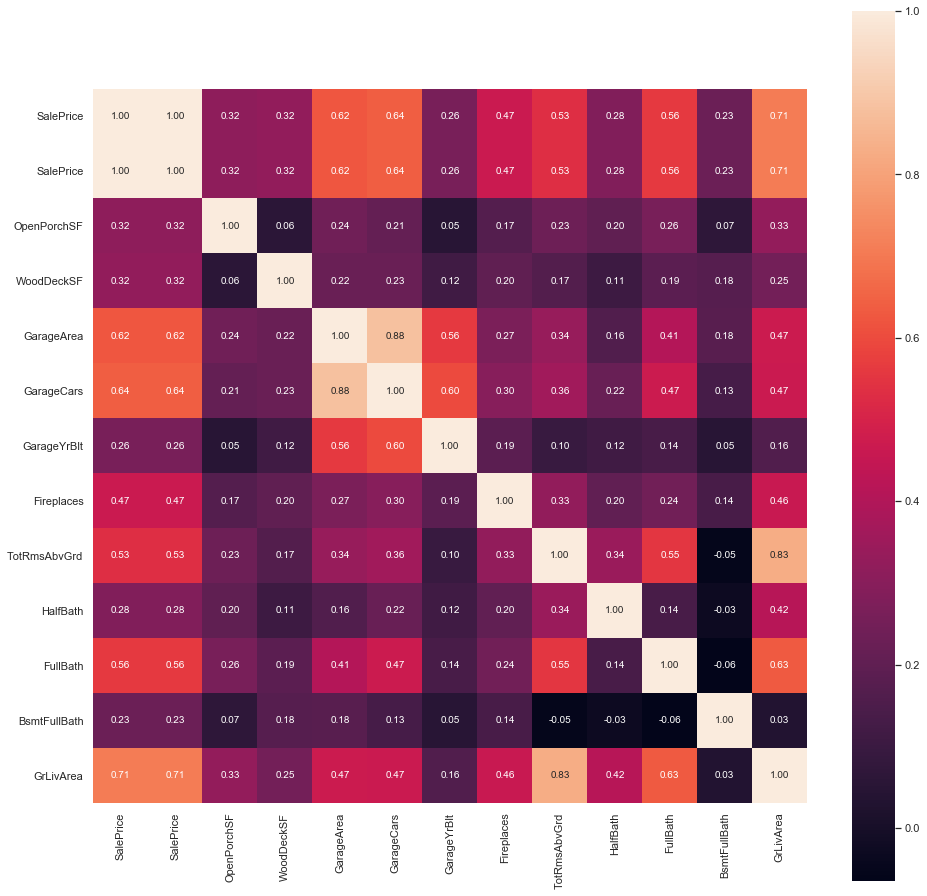

In [211]:
# Handling Missing Values for 19 features which have missing values mentioned above
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
# filling in missing GarageYrBuilt values with zeros.  
# But this may not be the most logical approach - refer to this discussion below for mor perspective
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60143

# similary fillingup na valuse for couple of other features
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [213]:
# Checking out missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
YearRemodAdd      0  0.000000
RoofStyle         0  0.000000
RoofMatl          0  0.000000
ExterQual         0  0.000000

## And we will use the famous LinearRegression() function of scikit-learn to implement this in a while.
First some data pre-procession.


In [223]:

train_target_label = df_train['SalePrice']
# labels are dependent variables whose values are to be predicted. 
top_feature_columns_modified = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'OpenPorchSF', 
        'WoodDeckSF', '2ndFlrSF', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'LotArea']

training_sample_df = df_train[top_feature_columns_modified]
test_sample_df = df_test[top_feature_columns_modified]

training_sample_df.head()

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  FullBath  \
0            7       1710           2          856       2003         2   
1            6       1262           2         1262       1976         2   
2            7       1786           2          920       2001         2   
3            7       1717           3          756       1915         1   
4            8       2198           3         1145       2000         2   

   OpenPorchSF  WoodDeckSF  2ndFlrSF  YearRemodAdd  MasVnrArea  LotFrontage  \
0           61           0       854          2003       196.0         65.0   
1            0         298         0          1976         0.0         80.0   
2           42           0       866          2002       162.0         68.0   
3           35           0       756          1970         0.0         60.0   
4           84         192      1053          2000       350.0         84.0   

   LotArea  
0     8450  
1     9600  
2    11250  
3     9550  
4    14260

In [224]:
test_sample_df.head()

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  FullBath  \
0            5        896         1.0        882.0       1961         1   
1            6       1329         1.0       1329.0       1958         1   
2            5       1629         2.0        928.0       1997         2   
3            6       1604         2.0        926.0       1998         2   
4            8       1280         2.0       1280.0       1992         2   

   OpenPorchSF  WoodDeckSF  2ndFlrSF  YearRemodAdd  MasVnrArea  LotFrontage  \
0            0         140         0          1961         0.0         80.0   
1           36         393         0          1958       108.0         81.0   
2           34         212       701          1998         0.0         74.0   
3           36         360       678          1998        20.0         78.0   
4           82           0         0          1992         0.0         43.0   

   LotArea  
0    11622  
1    14267  
2    13830  
3     9978  
4     5005

Do some data pre-processing by replacing all null values with median
using scikit-learn's Imputer class.

The strategy parameter is optional and takes a string, (default="mean")

If "mean", then replace missing values using the mean along the axis.
If "median", then replace missing values using the median along the axis.
If "most_frequent", then replace missing using the most frequent value along the axis.

In [225]:
imputer = SimpleImputer(strategy = 'median')

# During fit() the imputer learns about the mean, median etc of the data,
# which is then applied to the missing values during transform().
imputer.fit(training_sample_df)
imputer.fit(test_sample_df)

# Note - sklearn.preprocessing.Imputer.fit_transform returns a new array, it doesn't alter the argument array.
training_sample_df = imputer.transform(training_sample_df)
test_sample_df = imputer.transform(test_sample_df)

Previously we standardized the data with manual plain-python implement
#### Now we will use sklearn function

In [226]:
scaler = StandardScaler()

# Again, during fit() the imputer learns about the mean, median etc of the data,
# which is then applied to the missing values during transform().
scaler.fit(training_sample_df)
scaler.fit(test_sample_df)

training_sample_df = scaler.transform(training_sample_df)
test_sample_df = scaler.transform(test_sample_df)

In [227]:
# Syntax of train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(training_sample_df, train_target_label, random_state=42, train_size = 0.8 )

X_train.shape

(1168, 13)

In [228]:
X_test.shape

(292, 13)

In [229]:
training_sample_df.shape

(1460, 13)

In [230]:
test_sample_df.shape

(1459, 13)

### Now finally run a Linear Regression model.

In [231]:
model = LinearRegression()
# we have to fit this model to our data, in other words, we have to make it “learn” using our training data.
# The syntax of the fit function is just plain model.fit(X_train, Y_train)
model.fit(training_sample_df, train_target_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
print('Intercept is ', model.intercept_)

# For retrieving the slope (coefficient of x). This will be an array of values.
print("Slope i.e. coefficient of x is ", model.coef_)

Intercept is  177921.01851212673
Slope i.e. coefficient of x is  [28196.91947993 26349.76648831  9645.4413169   7658.2055073
  6637.47089276 -2965.55939821   768.02475758  4437.72171596
 -4227.6251946   6888.80707764  5992.62389513   579.10402749
  2935.94808718]


In [233]:
# regression = model.fit(training_sample_df, train_target_label)
print("Regression score is", model.score(training_sample_df, train_target_label))
print('train_target_label is ', train_target_label)

Regression score is 0.7858973705366121
train_target_label is  0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


Now that my model is trained with the training data set, I can now start testing the model with the testing dataset to Predict Sales Price from Test data set.
The y_predict is a numpy array that contains all the predicted values for the input values in the X_test series.

The general syntax is for making predictions on the test data, I have to execute the following form of:

```python
regressor = LinearRegression()
y_predition_from_model = regressor.predict(X_test)
```

In [234]:
y_predict = model.predict(X_test)

In [235]:
rmse_simple_linear = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Square Error is ', rmse_simple_linear)

# MSE_Log
rmse_log_simple_linear = np.sqrt(mean_squared_log_error(y_test, y_predict))
print('Root Mean Square Log Error is ', rmse_log_simple_linear)


Root Mean Square Error is  36992.39012928462
Root Mean Square Log Error is  0.26703294966342594


In [236]:
prediction_on_test_data = model.predict(test_sample_df)
# print("Regression score on test sample data is", model.score(test_sample_df, train_target_label ))
testID = df_test['Id']
predict_submission = pd.DataFrame()
predict_submission['ID'] = testID
predict_submission['SalePrice'] = prediction_on_test_data
predict_submission

ID      SalePrice
0     1461  108125.218262
1     1462  171809.395377
2     1463  172711.837537
3     1464  195073.734546
4     1465  209815.191496
...    ...            ...
1454  2915   68025.514633
1455  2916   80707.019360
1456  2917  174307.976512
1457  2918  114170.511870
1458  2919  240588.774556

[1459 rows x 2 columns]

### Now I will do Ridge Regression

#### Some notes on Ridge Regression and The Lasso

The difference between the two methods and that **ridge regression** shrinks the regression coefficients towards zero while the Lasso sets some of them to be zero and that's why it's in a way a subset selection procedure. 

Ridge regression uses a quadratic penalty, and this is very small for small coefficients, giving almost no regularisation benefit from further reduction, which is why it typically fails to force any of them fully to zero

LASSO uses an absolute value penalty, so reducing a small coefficient to zero can give the same regularisation benefit as reducing a large coefficient by a small amount, making the approach frequently reduce the number of variables actively used in the final model.

In Linear regression, we have $\textbf{$\theta$} = \textbf{$\left (X^TX\right )^{-1} X^T y$}$. 

In Ridge regression, we have 

$\textbf{$\theta$} = \textbf{$\left ( \lambda I+ X^TX\right )^{-1} X^T y$}$

Least squares, Lasso and Rigde regression minimize the following objective functions respectively:

$\min ||y - X \beta||_2^2 $

$\min ||y - X \beta||_2^2 + \lambda ||\beta||_1 $,

$\min ||y - X \beta||_2^2 + \lambda ||\beta||_2 $,

The objective function in ridge regression has two terms. The penalty term $\lambda \|\beta\|_2^2$ encourages the coefficients to be small. However, the main term $\|y - X \beta\|^2$ encourages the choice of coefficients to fit $y$ well. So there is a tension between these two competing goals of fitting $y$ well and keeping the coefficients small.

Given a metrix $X$ and a vector $\vec{y}$, ordinary least squares (OLS) regression tries to find $\vec{c}$ such that $\left\|  X \vec{c} - \vec{y} \right\|_2^2$ is minimal. (If we assume that $\left\| \vec{v}\right\|_2^2=\vec{v} \cdot \vec{v}$.)

Ridge regression tries to find $\vec{c}$ such that $\left\| X \vec{c} - \vec{y} \right\|_2^2 + \left\| \beta \vec{c} \right\|_2^2 $ is minimal.

In [237]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(training_sample_df, train_target_label)
y_predict_ridge = model_ridge.predict(X_test)

mse_linear_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge))
print('MSE of Linear Ridge is ', mse_linear_ridge)

# Log Error
mse_log_linear_ridge = np.sqrt(mean_squared_log_error(y_test, y_predict_ridge))
print('MSE Log of Linear Ridge is ', mse_log_linear_ridge)


MSE of Linear Ridge is  36992.54832288
MSE Log of Linear Ridge is  0.26682113387130174


#### And now MSE Calculation for Lasso Regression

In [238]:
model_lasso = Lasso(alpha=33)
model_lasso.fit(training_sample_df, train_target_label)
y_predict_lasso = model_lasso.predict(X_test)

mse_linear_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso))
print('MSE of Lasso Regression is ', mse_linear_lasso)

# Log Error
mse_log_linear_lasso = np.sqrt(mean_squared_log_error(y_test, y_predict_lasso))
print('MSE Log of Lasso Regression is ', mse_log_linear_lasso)

MSE of Lasso Regression is  37002.420402536394
MSE Log of Lasso Regression is  0.2665108348893785


##### Now we will be using Random Forest, and some brief notes on Random Forrest

One big advantage of random forest is that it can be used for both classification and regression problems.  We can also deal with regression tasks by using the algorithm's regressor.  You can also deal with regression tasks by using the algorithm's regressor. 
##### We can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Random forest, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

The low correlation between models (trees) is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). 

One of the biggest problems in machine learning is overfitting, but most of the time this won’t happen thanks to the random forest classifier. If there are enough trees in the forest, the classifier won’t overfit the model.

The main limitation of random forest is that a large number of trees can make the algorithm too slow and ineffective for real-time predictions.

A great quality of the random forest algorithm is that it is very easy to measure the relative importance of each feature on the prediction. Sklearn provides a great tool for this that measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results so the sum of all importance is equal to one.


### Decision Tree Algorithm

- It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

- The decisions or the test are performed on the basis of features of the given dataset.

![](https://i.imgur.com/9bK9AF8.png)


Here is a good description from Wikipedia: '"In a decision tree each internal node represents a 'test' on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). A node that has no children is a leaf.'"


Further from [Widipedia Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning) - "A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The arcs coming from a node labeled with an input feature are labeled with each of the possible values of the target feature or the arc leads to a subordinate decision node on a different input feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes, signifying that the data set has been classified by the tree into either a specific class, or into a particular probability distribution (which, if the decision tree is well-constructed, is skewed towards certain subsets of classes)."

#### Now some guidance on the depth of the trees? How to choose the reasonable ones ?

###### Deeper trees reduces the bias; more trees reduces the variance.

The most important hyper-parameter is how many features to test for each split. The more useless features there are, the more features you should try.

Generally,

- **Number of trees:** the bigger the better. One way to evaluate and know when to stop is to monitor our error rate while building your forest (or any other evaluation criteria you could use) and detect when it converges. Also, the number of test nodes in your trees is upper bounded by the number of objects, so if you have lots of variables and not so many training objects, larger forest will be highly recommended in order to increase the chances of evaluating all the descriptors at least once in your forest.

However, more trees also mean more computational cost and after a certain number of trees, the improvement is negligible. An article from Oshiro et al. (2012) pointed out that, based on their test with 29 data sets, after 128 of trees there is no significant improvement

- **Tree depth:** To control how deep your trees are we can limit the maximum depth, limit the number of nodes, limit the number of objects required to split, stop splitting if the split does not sufficiently improves the fit,...). Most of the time, it is recommended to **prune (limit the depth of) the trees** if we are dealing with noisy data. Finally, we can use our fully developed trees to compute performance of shorter trees as these are a "subset" of the fully developed ones.

standard random forest algorithm grow the full decision tree without pruning. A single decision tree do need pruning in order to overcome over-fitting issue. However, in random forest, this issue is eliminated by random selecting the variables and the **OOB(out of bag)** action.

Tree correlation means that 2 trees are correlated in terms of predictor variable on which split is made. In bagging, **OOB(out of bag)** means that on average,we are able to use only 2/3rd of our dataset for building our tree and rest 1/3rd are not used. So we are trying to make prediction from **OOB 1/3rd dataset**.

In [239]:
RFR = RandomForestRegressor(max_depth=50)
RFR.fit(training_sample_df, train_target_label)

y_predict_random_forest = RFR.predict(X_test)

mse_random_forest = np.sqrt(metrics.mean_squared_error(y_test, y_predict_random_forest))
print('MSE Random Forest is ', mse_random_forest)

# Log Error
mse_log_random_forest = np.sqrt(mean_squared_log_error(y_test, y_predict_random_forest))
print('MSE Log Random Forest is ', mse_log_random_forest)

MSE Random Forest is  11075.165802708925
MSE Log Random Forest is  0.07106103337194337


Running the example above, fits the random forest ensemble model on the entire dataset and is then used to make a prediction on a new row of data. Randomness is used in the construction of the model. This means that each time the algorithm is run on the same data, it will produce a slightly different model.

In general, when using machine learning algorithms that have a stochastic learning algorithm, it is good practice to evaluate them by averaging their performance across multiple runs or repeats of cross-validation. When fitting a final model, it may be desirable to either increase the number of trees until the variance of the model is reduced across repeated evaluations, or to fit multiple final models and average their predictions.



In [240]:
# Y_test_predicted_for_submission = RFR.predict(df_test)
# Y_test_predicted_for_submission = RFR.predict(X_test)
Y_test_predicted_for_submission = RFR.predict(test_sample_df)

indexes = np.arange(df_test.shape[0]+2, 2*df_test.shape[0]+2)
print('Indexex ', indexes)

# output_for_submission = pd.DataFrame({'Id': test_sample_df.Id,
#                        'SalePrice': Y_test_predicted_for_submission})

# output_for_submission = pd.DataFrame({'Id': indexes,
#                        'SalePrice': Y_test_predicted_for_submission})

# output_for_submission = pd.DataFrame({'Id': df_test.Id,
#                        'SalePrice': Y_test_predicted_for_submission})

# print(output_for_submission)

# *****************
testID = df_test['Id']
output_for_submission = pd.DataFrame()
output_for_submission['ID'] = testID
output_for_submission['SalePrice'] = Y_test_predicted_for_submission
output_for_submission.to_csv('submission.csv', index=False)


Indexex  [1461 1462 1463 ... 2917 2918 2919]
